In [1]:
import pandas as pd

# Specify the path to your pickle file
pickle_file_path = r'D:\Users\ddknop\Documents\Thesis\PDM_finaal_EP\master_thesis\data\Zwalm_data\preprocess_output\forcings_ERA5_david.pkl'

# Load the pickle file into a DataFrame
data = pd.read_pickle(pickle_file_path)

# Convert the 'Timestamp' column to datetime (if not already in datetime format)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter the data from 2012-01-01 until the end
data_filtered = data[data['Timestamp'] >= '2012-01-01']

# Display the first few rows of the filtered data
print(data_filtered)



       Timestamp  potential_evaporation_sum  total_precipitation_sum
14428 2012-01-01                       0.84                     7.41
14429 2012-01-02                       1.54                     4.32
14430 2012-01-03                       3.72                     3.98
14431 2012-01-04                       3.96                     3.10
14432 2012-01-05                       4.32                    11.74
...          ...                        ...                      ...
18441 2022-12-27                       1.02                     0.41
18442 2022-12-28                       2.52                     4.30
18443 2022-12-29                       3.28                     2.67
18444 2022-12-30                       1.43                     6.77
18445 2022-12-31                       5.46                     8.56

[4018 rows x 3 columns]


In [2]:
import pandas as pd

# Specify the paths to the pickle files
ep_file_path = r'D:\Users\ddknop\Documents\Thesis\PDM_finaal_EP\master_thesis\data\Zwalm_data\preprocess_output\ep_thiessen_daily.pkl' 
p_file_path = r'D:\Users\ddknop\Documents\Thesis\PDM_finaal_EP\master_thesis\data\Zwalm_data\preprocess_output\p_thiessen_daily.pkl'

# Read the pickle files into DataFrames
ep_data = pd.read_pickle(ep_file_path)
p_data = pd.read_pickle(p_file_path)

# Ensure 'Timestamp' is in datetime format
ep_data['Timestamp'] = pd.to_datetime(ep_data['Timestamp'])
p_data['Timestamp'] = pd.to_datetime(p_data['Timestamp'])

# Merge the 'P_thiessen' and 'EP_thiessen' columns into the filtered data (on 'Timestamp')
data_filtered = data_filtered.merge(ep_data[['Timestamp', 'EP_thiessen']], on='Timestamp', how='left')
data_filtered = data_filtered.merge(p_data[['Timestamp', 'P_thiessen']], on='Timestamp', how='left')

# Display the updated DataFrame
print(data_filtered.to_string(index=False))

# Optionally, save the updated data to a new pickle file
updated_pickle_file_path = r'D:\Users\ddknop\Documents\Thesis\PDM_finaal_EP\master_thesis\data\Zwalm_data\preprocess_output\data_filtered_with_forcings.pkl'
data_filtered.to_pickle(updated_pickle_file_path)

print(f"Updated data has been saved to: {updated_pickle_file_path}")


 Timestamp  potential_evaporation_sum  total_precipitation_sum  EP_thiessen  P_thiessen
2012-01-01                       0.84                     7.41     0.069985    4.455689
2012-01-02                       1.54                     4.32     0.107131    5.964984
2012-01-03                       3.72                     3.98     0.304218    7.740356
2012-01-04                       3.96                     3.10     0.744225    6.037671
2012-01-05                       4.32                    11.74     1.009941   13.135637
2012-01-06                       3.09                     0.46     0.709970    0.261521
2012-01-07                       2.29                     1.65     0.434233    3.899495
2012-01-08                       1.40                     0.61     0.331386    0.232681
2012-01-09                       0.93                     0.33     0.231416    0.621686
2012-01-10                       0.25                     0.16     0.112847    0.000000
2012-01-11                      

Mean of potential_evaporation_sum: 3.8646764559482327
Mean of EP_thiessen: 1.523202497497216


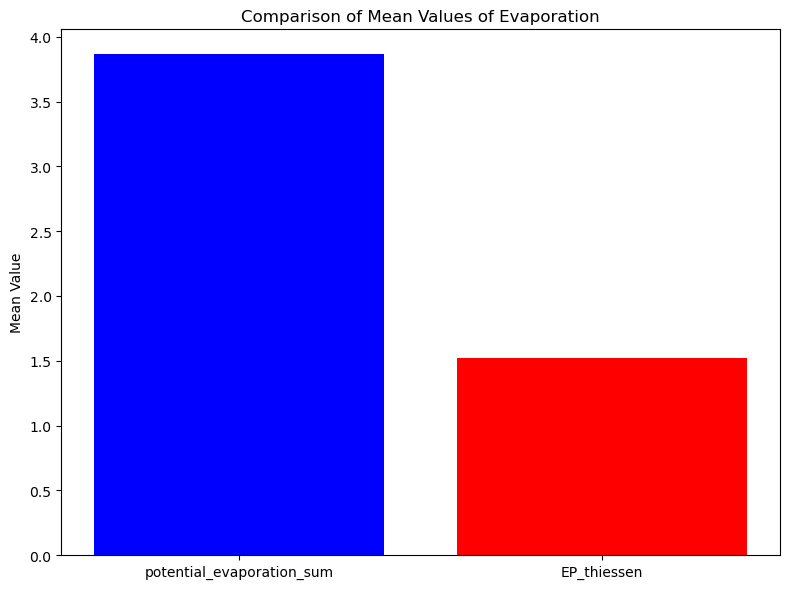

In [3]:
# Calculate the mean of 'potential_evaporation_sum' and 'EP_thiessen'
mean_potential_evaporation_sum = data_filtered['potential_evaporation_sum'].mean()
mean_EP_thiessen = data_filtered['EP_thiessen'].mean()

# Print the mean values
print(f"Mean of potential_evaporation_sum: {mean_potential_evaporation_sum}")
print(f"Mean of EP_thiessen: {mean_EP_thiessen}")

# Optionally, plot the means as a bar chart for comparison
import matplotlib.pyplot as plt

# Plotting the mean values
plt.figure(figsize=(8, 6))
plt.bar(['potential_evaporation_sum', 'EP_thiessen'], 
        [mean_potential_evaporation_sum, mean_EP_thiessen], 
        color=['blue', 'red'])

# Add labels and title
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values of Evaporation')

# Display the plot
plt.tight_layout()
plt.show()


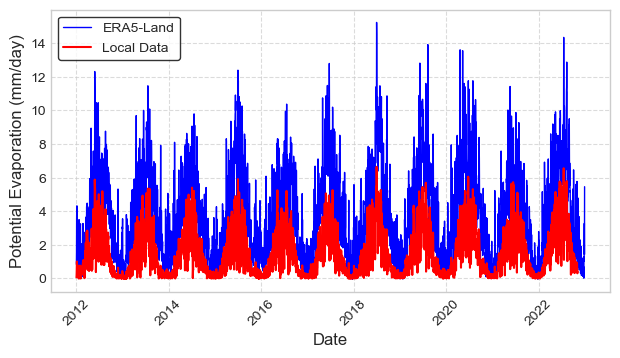

In [15]:
import matplotlib.pyplot as plt

# Ensure that 'Timestamp' is in datetime format
data_filtered['Timestamp'] = pd.to_datetime(data_filtered['Timestamp'])

# Plot the data
plt.figure(figsize=(6.3, 3.5))

# Plot 'potential_evaporation_sum' over time
plt.plot(data_filtered['Timestamp'], data_filtered['potential_evaporation_sum'], label='ERA5-Land', color='blue',linewidth=1)

# Plot 'EP_thiessen' over time
plt.plot(data_filtered['Timestamp'], data_filtered['EP_thiessen'], label='Local Data', color='red')

# Add labels and title
plt.xlabel('Date', fontsize =12)
plt.ylabel('Potential Evaporation (mm/day)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.style.use('seaborn-v0_8-whitegrid')
# Add a legend
plt.legend(frameon=True, edgecolor='black')
plt.savefig("comparison_EP_final.png", dpi=1000, bbox_inches='tight')
plt.show()




Mean of total_precipitation_sum: 2.202068193130911
Mean of P_thiessen: 2.1280450968985027


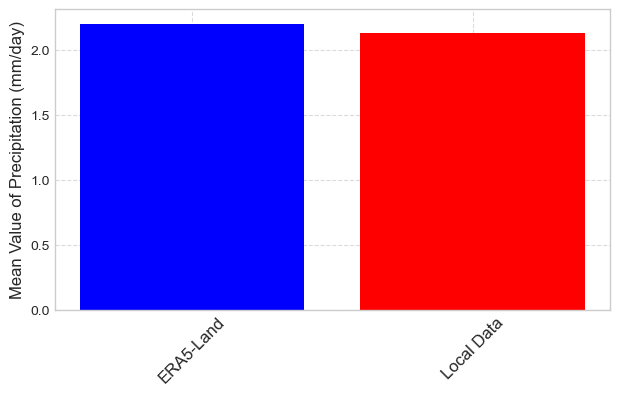

In [5]:
# Calculate the mean of 'total_precipitation_sum' and 'P_thiessen'
mean_total_precipitation_sum = data_filtered['total_precipitation_sum'].mean()
mean_P_thiessen = data_filtered['P_thiessen'].mean()

# Print the mean values
print(f"Mean of total_precipitation_sum: {mean_total_precipitation_sum}")
print(f"Mean of P_thiessen: {mean_P_thiessen}")

# Optionally, plot the means as a bar chart for comparison
import matplotlib.pyplot as plt

# Plotting the mean values
plt.figure(figsize=(6.3, 3.5))
plt.bar(['ERA5-Land', 'Local Data'], 
        [mean_total_precipitation_sum, mean_P_thiessen], 
        color=['blue', 'red'])
plt.xticks(fontsize=12)
# Add labels and title
plt.ylabel('Mean Value of Precipitation (mm/day)',fontsize =12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.style.use('seaborn-v0_8-whitegrid')
# Add a legend

plt.show()



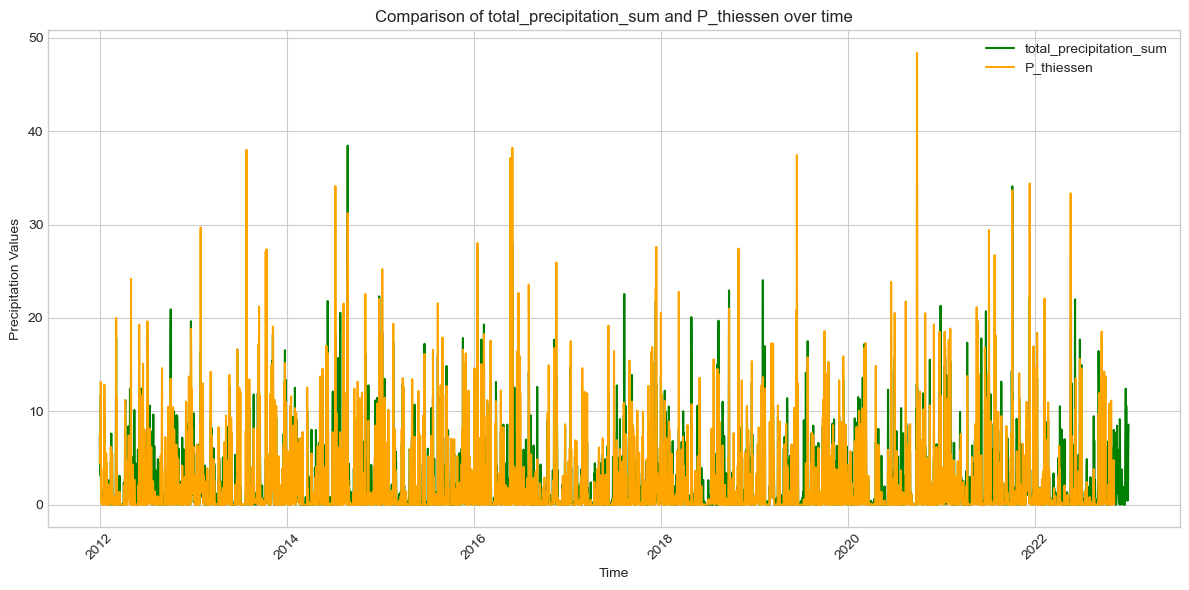

In [6]:
import matplotlib.pyplot as plt

# Ensure that 'Timestamp' is in datetime format
data_filtered['Timestamp'] = pd.to_datetime(data_filtered['Timestamp'])

# Plot the data
plt.figure(figsize=(12, 6))

# Plot 'total_precipitation_sum' over time
plt.plot(data_filtered['Timestamp'], data_filtered['total_precipitation_sum'], label='total_precipitation_sum', color='green')

# Plot 'P_thiessen' over time
plt.plot(data_filtered['Timestamp'], data_filtered['P_thiessen'], label='P_thiessen', color='orange')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Precipitation Values')
plt.title('Comparison of total_precipitation_sum and P_thiessen over time')

# Add a legend
plt.legend()

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Number of red dots (> 10 mm): 40
Number of blue dots (< -10 mm): 12


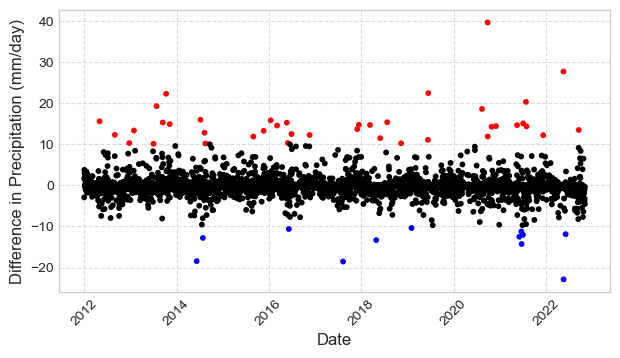

In [11]:
import matplotlib.pyplot as plt

# Ensure 'Timestamp' is in datetime format
data_filtered['Timestamp'] = pd.to_datetime(data_filtered['Timestamp'])

# Calculate the difference
data_filtered['Precipitation_Difference'] = data_filtered['P_thiessen'] - data_filtered['total_precipitation_sum']

# Count red and blue dots
num_red = (data_filtered['Precipitation_Difference'] > 10).sum()
num_blue = (data_filtered['Precipitation_Difference'] < -10).sum()

print(f"Number of red dots (> 10 mm): {num_red}")
print(f"Number of blue dots (< -10 mm): {num_blue}")

# Define colors based on thresholds
colors = [
    'red' if diff > 10 else 
    'blue' if diff < -10 else 
    'black' 
    for diff in data_filtered['Precipitation_Difference']
]

# Create scatter plot with conditional colors
plt.figure(figsize=(6.3, 3.5))
plt.scatter(data_filtered['Timestamp'], data_filtered['Precipitation_Difference'], color=colors, s=10)

# Add labels and title
plt.xlabel('Date', fontsize =12)
plt.ylabel('Difference in Precipitation (mm/day)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.style.use('seaborn-v0_8-whitegrid')
# Add a legend
plt.savefig("vergelijking_P_scatter.png", dpi=1000, bbox_inches='tight')
plt.show()


       Timestamp  potential_evaporation_sum  total_precipitation_sum
14428 2012-01-01                   4.719795                     7.41
14429 2012-01-02                   3.995353                     4.32
14430 2012-01-03                   4.056055                     3.98
14431 2012-01-04                   3.824692                     3.10
14432 2012-01-05                   3.997542                    11.74


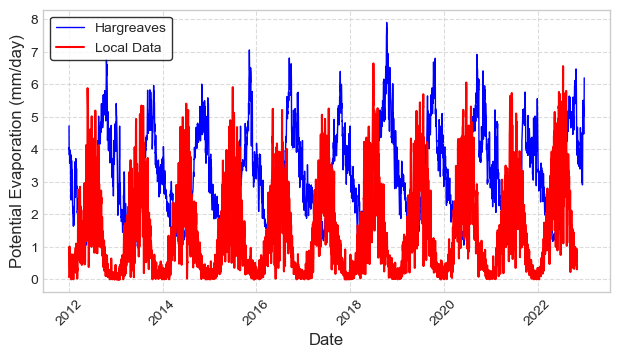

In [12]:
import pandas as pd

# Read the pickle files (replace with your file paths)
df_1 = pd.read_pickle(r'E:\Users\ddknop\PDM_finaal_EP\master_thesis\data\Zwalm_data\preprocess_output\p_ep_with_adaptions_ep.pkl')


# Ensure 'Timestamp' is in datetime format for both DataFrames
df_1['Timestamp'] = pd.to_datetime(df_1['Timestamp'])


# Group df_1 by day, aggregating with sum (or mean) for each day
df_1_daily = df_1.groupby(df_1['Timestamp'].dt.date).agg({
    'potential_evaporation_sum': 'sum',  # or 'mean' depending on your requirement
    'total_precipitation_sum': 'sum'     # or 'mean' depending on your requirement
}).reset_index()

# Convert the 'Timestamp' column back to datetime format (for daily format)
df_1_daily['Timestamp'] = pd.to_datetime(df_1_daily['Timestamp'])

# Set the start date and end date based on df_2
start_date = '2012-01-01'  # Starting from the first date in df_2
end_date = '2022-12-31'   # Ending at the last date in df_2

# Optionally, filter df_1_daily to match the date range of df_2
df_1_daily = df_1_daily[(df_1_daily['Timestamp'] >= start_date) & (df_1_daily['Timestamp'] <= end_date)]

# Print the first few rows of the adjusted df_1_daily
print(df_1_daily.head())


import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_1_daily and df_2 are already defined as before

# Plot the data
plt.figure(figsize=(6.3, 3.5))

# Plot df_1_daily
plt.plot(df_1_daily['Timestamp'], df_1_daily['potential_evaporation_sum'], label='Hargreaves', color='blue',linewidth=1)

# Plot df_2
plt.plot(data_filtered['Timestamp'], data_filtered['EP_thiessen'], label='Local Data', color='red')


# Adding labels and title
plt.xlabel('Date', fontsize =12)
plt.ylabel('Potential Evaporation (mm/day)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.style.use('seaborn-v0_8-whitegrid')
# Add a legend
plt.legend(frameon=True, edgecolor='black', loc='upper left')
plt.savefig("Hargreaves.png", dpi=1000, bbox_inches='tight')
plt.show()







       Timestamp  potential_evaporation_sum  total_precipitation_sum
22644 2012-01-01                       0.33                     7.41
22645 2012-01-02                       0.20                     4.32
22646 2012-01-03                       0.67                     3.98
22647 2012-01-04                       0.89                     3.10
22648 2012-01-05                       0.93                    11.74
...          ...                        ...                      ...
26657 2022-12-27                       0.06                     0.41
26658 2022-12-28                       0.72                     4.30
26659 2022-12-29                       0.70                     2.67
26660 2022-12-30                       0.20                     6.77
26661 2022-12-31                       1.52                     8.56

[4018 rows x 3 columns]


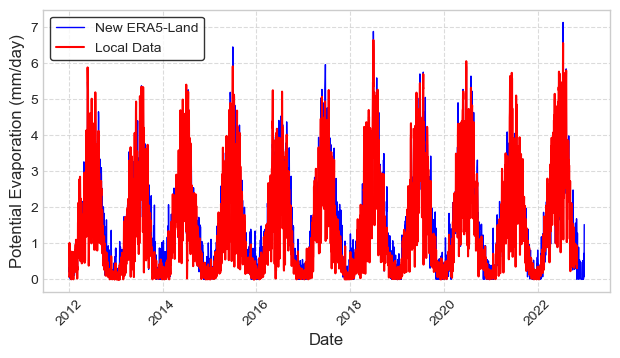

In [14]:
import pandas as pd
from pathlib import Path
import xarray as xr
from datetime import timedelta

path = r'E:\Users\ddknop\PDM_finaal_EP\master_thesis\output_caravan\timeseries\netcdf\vlaamsebekken/6.nc'
df = xr.open_dataset(path)
df_df = df.to_dataframe()


df_filtered = df_df[['potential_evaporation_sum_FAO_PENMAN_MONTEITH', 'total_precipitation_sum']]
df_filtered = df_filtered.reset_index(drop = False)
df_filtered = df_filtered[(df_filtered['date'] >= '2012-01-01') & (df_filtered['date'] <= '2022-12-31')]
df_filtered = df_filtered.rename(columns={'date': 'Timestamp', 'potential_evaporation_sum_FAO_PENMAN_MONTEITH': 'potential_evaporation_sum'})

print(df_filtered)

plt.figure(figsize=(6.3, 3.5))


# Plot df_1_daily
plt.plot(df_filtered['Timestamp'], df_filtered['potential_evaporation_sum'], label='New ERA5-Land', color='blue',linewidth=1)

# Plot df_2
plt.plot(data_filtered['Timestamp'], data_filtered['EP_thiessen'], label='Local Data', color='red')

# Adding labels and title
plt.xlabel('Date', fontsize =12)
plt.ylabel('Potential Evaporation (mm/day)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.style.use('seaborn-v0_8-whitegrid')
# Add a legend
plt.legend(frameon=True, edgecolor='black')
plt.savefig("newera5landep.png", dpi=1000, bbox_inches='tight')
plt.show()